In [8]:
from bayesian_i import *
import style

In [9]:
# calculate pdf of v --> unecesary?

def velocity(R, P):
    return 2*np.pi*R/P

def sig_velocity(R, P, R_err, P_err):
    return 2*np.pi*np.sqrt((R_err/P)**2 + (R*R_err/P**2)**2)
    

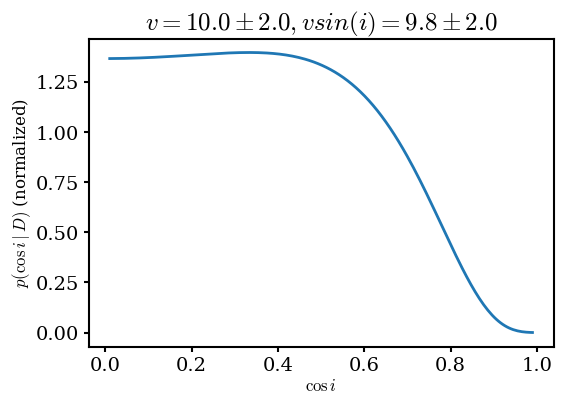

In [18]:
# Recreating 

# --- Observations and priors ---
v_obs, v_sigma = 10.0, 2.0     # km/s
u_obs, u_sigma = 9.8, 2.0      # km/s

# --- Evaluate over a grid of cos(i) ---
cosi_grid = np.linspace(0.01, 0.99, 200)
posterior = np.array([p_cosi(c, v_obs, u_obs, v_sigma, u_sigma) for c in cosi_grid])
posterior /= np.trapezoid(posterior, cosi_grid)  # normalize

# --- Plot ---
plt.figure(figsize=(6,4))
plt.plot(cosi_grid, posterior, lw=2)
plt.xlabel(r'$\cos i$')
plt.ylabel(r'$p(\cos i \mid D)$ (normalized)')
plt.title(fr'$v = {v_obs} \pm {v_sigma}, v sin(i) = {u_obs} \pm {u_sigma}$')
plt.show()
